# Simple Hybrid Example - Basic Tau Hybrid Solver

This solver is capable of solving models which include both discrete and continuous species.  In order for a species to be considered continuously, it must be included in a rate_rule, along with it's rate of change.  This species can then be considered in reactions by explicitly declaring the propensity function.

### Imports

In [1]:
import sys, os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

### Instantiate Model
Model requires species, parameters, and reactions.  rate_rules can also be added to model a species continuously

In [2]:

class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=0)
            V = gillespy2.Species(name='V', initial_value=init_v, mode='continuous')

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
            rate_rule1 = gillespy2.RateRule(V, "cos(t)")
            self.add_parameter([rate1, rate2])
            self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1, r2])
#             self.timespan(numpy.linspace(0,100, 1001))

In [3]:
model = SimpleHybridModel()

### Run Model and Plot

Run the simulation by calling the run method of the model, and selecting this solver with the 'solver' keyword argument. Results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'

In [4]:
%time results = model.run(solver=BasicTauHybridSolver(), show_labels=True, debug=False)

CPU times: user 344 ms, sys: 15.6 ms, total: 359 ms
Wall time: 346 ms


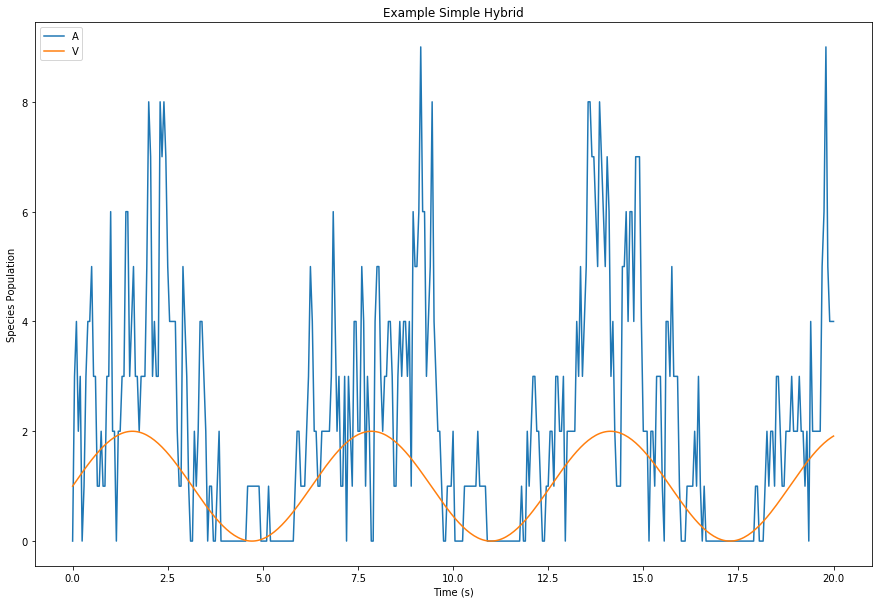

In [5]:
plt.figure(figsize=(15,10))
plt.title("Example Simple Hybrid")
plt.xlabel("Time (s)")
plt.ylabel("Species Population")
plt.plot(results[0]['time'], results[0]['A'], label='A')
plt.plot(results[0]['time'], results[0]['V'], label='V')
plt.legend(loc='best')
ex_simp_hyb_plot = plt.gcf()